# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=19BuQ5m0xZWC7vQN4jX9lukmJ4aE0EkL8)

![alt text](https://drive.google.com/uc?id=10tbeSkGZ0xdHtqTGhYwHhb9PPURw0BfD)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [3]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# Each class contains 133 images.
# Dataset Source:
# https://github.com/ieee8023/covid-chestxray-dataset 
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load Dataset

In [32]:
train_path = 'E://Web/Dataset/COVID-19_Radiography/z_Sampled/Train/'
test_path = 'E://Web/Dataset/COVID-19_Radiography/z_Sampled/Test/'

In [33]:
os.listdir(test_path)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [63]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.3)

In [64]:
train_batches = data_gen.flow_from_directory(train_path,subset='training',target_size=(256,256),class_mode='categorical',batch_size=32)


val_batches = data_gen.flow_from_directory(train_path,subset='validation',target_size=(256,256),class_mode='categorical',batch_size=32)


test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input) \
.flow_from_directory(test_path,target_size=(256,256),class_mode='categorical',batch_size=32,shuffle=False)


Found 3640 images belonging to 4 classes.
Found 1560 images belonging to 4 classes.
Found 180 images belonging to 4 classes.


In [65]:
# labels Translator 
# target_names = {0:'covid19',1:'normal',2:'viral_pneumonia',3:'bacterial_pneumonia'}

In [66]:
target_names = {v:k for k,v in train_batches.class_indices.items()}
target_names

{0: 'COVID', 1: 'Lung_Opacity', 2: 'Normal', 3: 'Viral Pneumonia'}

# TASK #3: VISUALIZE DATASET

In [67]:
imgs,lab = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

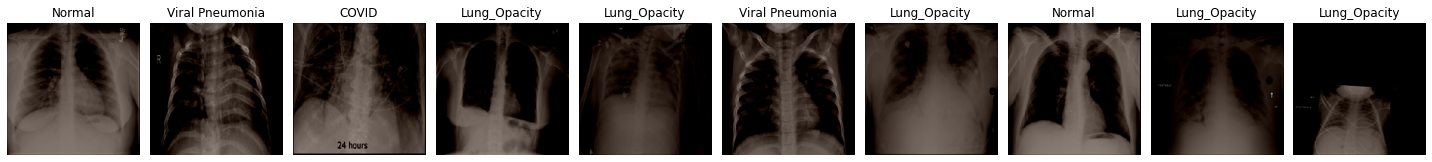

In [68]:
plt.figure(figsize=(20,5))

for i in range(1,11):
    
    plt.subplot(1,10,i)
    plt.imshow(imgs[i]/255.,cmap='gray')
    plt.title(target_names.get(np.argmax(lab[i])))
    plt.axis('off')

plt.tight_layout()
plt.show()

# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=176TJGdJtNZmX4J5QyeI8W_YS5f1gg5VS)

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

![alt text](https://drive.google.com/uc?id=1hngDlUf9JnwUhPII-Ah7KTtcvoeTI9m8)

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1Wnti2DSmA2qMRsgkD7Z_MJkmed0bJZTN)

![alt text](https://drive.google.com/uc?id=1Chdq0gdnHGYDDb50pMMtcTOZMr0u37Iz)

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# TASK #6: IMPORT MODEL WITH PRETRAINED WEIGHTS

In [73]:
resnet = ResNet50(include_top=False,input_shape=(256,256,3))

In [74]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [75]:
# freezing layers in the model
for layer in resnet.layers[:-5]:
    layer.trainable = False

In [76]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# TASK #7: BUILD AND TRAIN DEEP LEARNING MODEL

In [77]:
headmodel = resnet.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)

headmodel = Flatten(name="flatten")(headmodel)

headmodel = Dense(128,activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)

headmodel = Dense(128,activation='relu')(headmodel)

headmodel = Dense(128,activation='relu')(headmodel)

headmodel = Dense(4,activation='softmax')(headmodel)

In [78]:
model = Model(inputs=resnet.input , outputs=headmodel)

In [79]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [80]:
model.compile(optimizer=optimizers.RMSprop(1e-4),loss='categorical_crossentropy' ,metrics=['acc'])

In [81]:
# using early stopping to exit training if validation loss is not decreasing after certain number of epochs (patience)
early_stop = EarlyStopping(monitor='val_loss' , mode='min',patience=5)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath='weights.h5',verbose=1,save_best_only=True)

In [82]:
hist = model.fit(train_batches,validation_data=val_batches,epochs=5,callbacks=[early_stop,checkpointer])

Epoch 1/5
114/114 [==============================] - 1269s 11s/step - loss: 0.5356 - acc: 0.7915 - val_loss: 0.2796 - val_acc: 0.8949

Epoch 00001: val_loss improved from inf to 0.27965, saving model to weights.h5


c:\users\studa\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
114/114 [==============================] - 1244s 11s/step - loss: 0.2759 - acc: 0.8997 - val_loss: 0.2153 - val_acc: 0.9173

Epoch 00002: val_loss improved from 0.27965 to 0.21526, saving model to weights.h5
Epoch 3/5
114/114 [==============================] - 1078s 9s/step - loss: 0.2020 - acc: 0.9247 - val_loss: 0.2035 - val_acc: 0.9295

Epoch 00003: val_loss improved from 0.21526 to 0.20354, saving model to weights.h5
Epoch 4/5
114/114 [==============================] - 1143s 10s/step - loss: 0.1479 - acc: 0.9495 - val_loss: 0.2049 - val_acc: 0.9256

Epoch 00004: val_loss did not improve from 0.20354
Epoch 5/5
114/114 [==============================] - 1157s 10s/step - loss: 0.1076 - acc: 0.9599 - val_loss: 0.1890 - val_acc: 0.9365

Epoch 00005: val_loss improved from 0.20354 to 0.18895, saving model to weights.h5


### Load best model

In [86]:
model.load_weights('weights.h5')

# TASK #8: EVALUATE TRAINED DEEP LEARNING MODEL

In [87]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

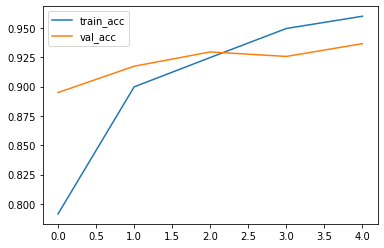

In [88]:
plt.plot(hist.history['acc'],label='train_acc')
plt.plot(hist.history['val_acc'],label='val_acc')
plt.legend()

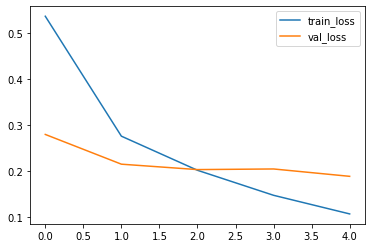

In [89]:
plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

### Evaluate on test set

In [90]:
model.evaluate(test_batches)

6/6 [==============================] - 36s 6s/step - loss: 0.0724 - acc: 0.9833


[0.072428397834301, 0.9833333492279053]

In [91]:
pred = model.predict(test_batches)
pred = np.argmax(pred,axis=1)

In [92]:
trans = lambda x:target_names[x]
pred  = np.vectorize(trans)(pred)
true  = np.vectorize(trans)(test_batches.labels)

In [93]:
# add all images in test_batch
x = []
for i in range(2):
    for k in next(test_batches)[0]:
        x.append(k)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

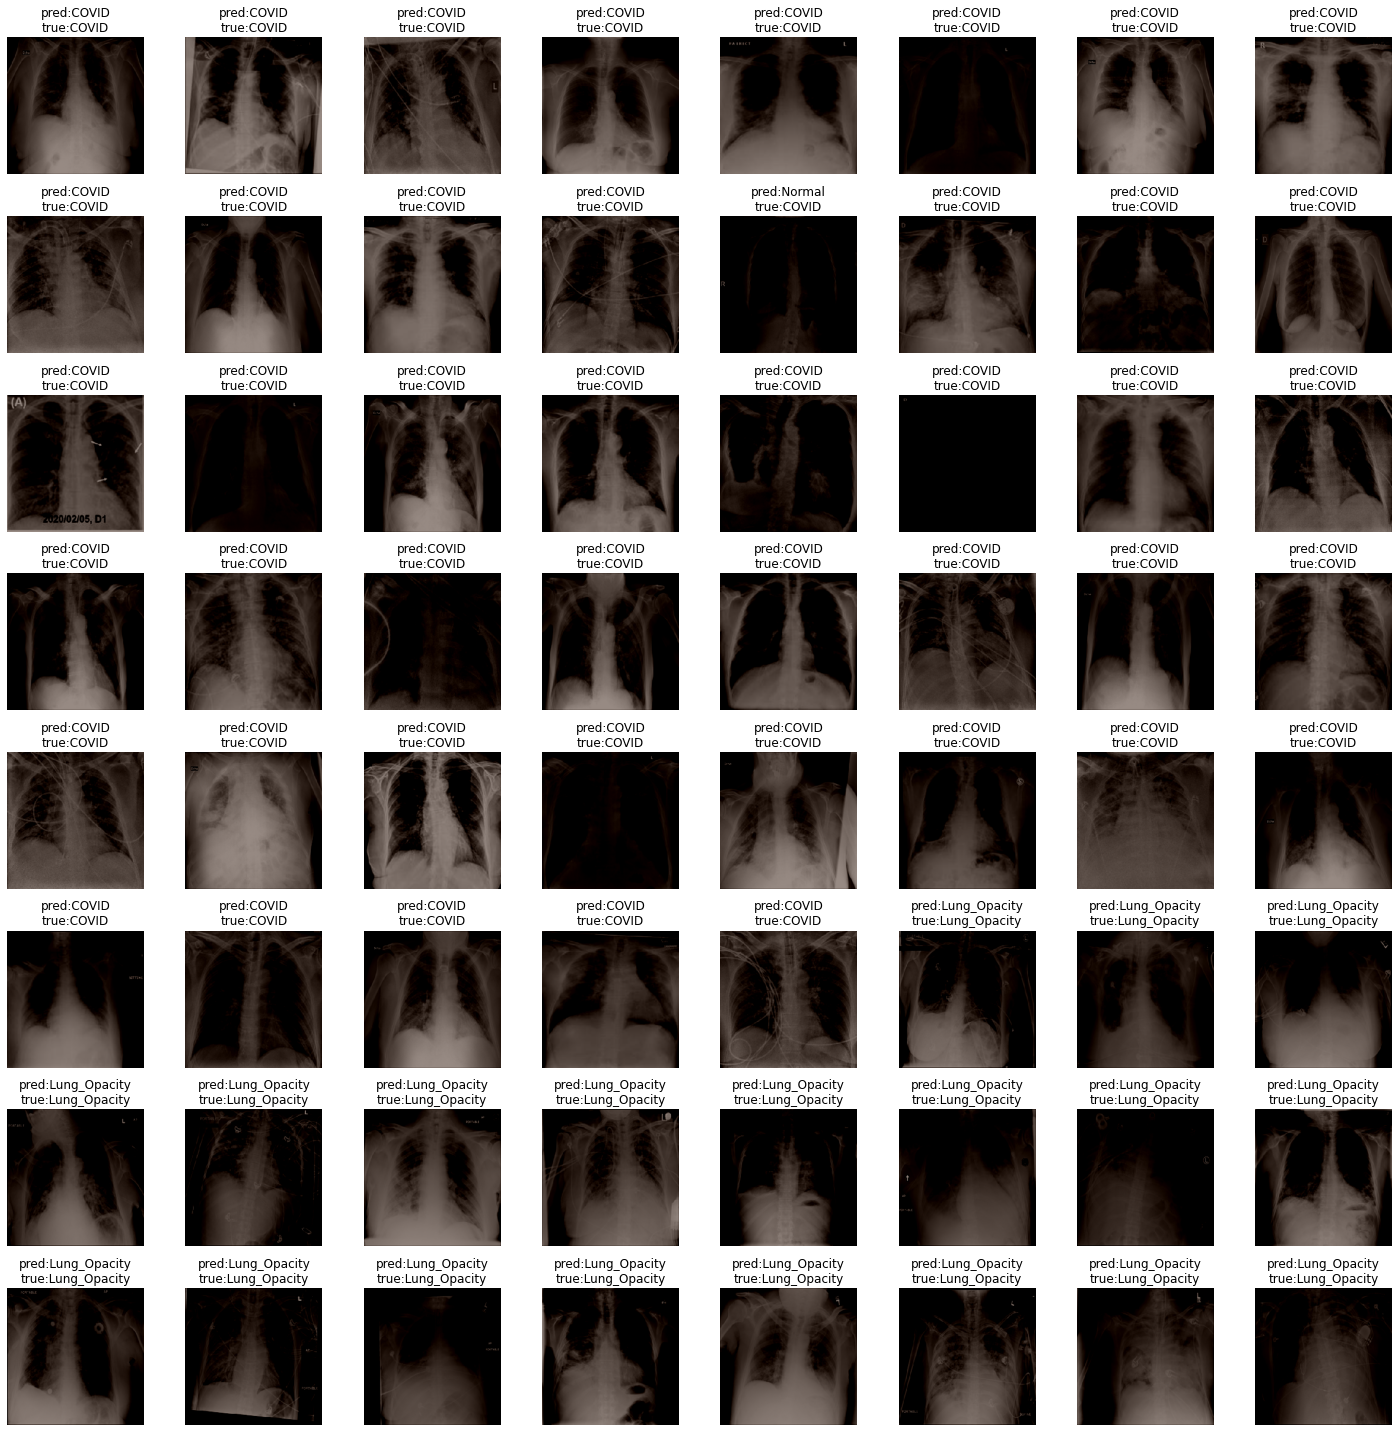

In [103]:
r=8
c= 8

fig,axes = plt.subplots(r,c,figsize=(20,20))

axes = axes.ravel()

for i in np.arange(0,c*r):
    axes[i].imshow(x[i]/255.,cmap='gray')
    axes[i].set_title(f'pred:{pred[i]}\ntrue:{true[i]}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()